# Final Project
## What makes a college player successful in the NBA

In [18]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Import first dataset

In [19]:
#Dataset with Player name, year, and draft pick
df_draft = pd.read_csv('/Users/dempseywade/Desktop/gitRepo/NBADraftFinalProject/data/NBA_Full_Draft_1947-2018.csv')

#Drop unnecessary datasets
df_draft = df_draft.drop(['Unnamed: 0', 'Play_Yrs','College',
                          'Games','Team'], axis = 1)

#Filter old players
df_draft = df_draft[df_draft.Year >=2012]

#Change type
df_draft.Player = df_draft.Player.astype('string')

#Visualize the dataset
df_draft.head(10)

,Player,Year,Pick
7543,Anthony Davis,2012,1
7544,Michael Kidd-Gilchrist,2012,2
7545,Bradley Beal,2012,3
7546,Dion Waiters,2012,4
7547,Thomas Robinson,2012,5
7548,Damian Lillard,2012,6
7549,Harrison Barnes,2012,7
7550,Terrence Ross,2012,8
7551,Andre Drummond,2012,9
7552,Austin Rivers,2012,10


In [20]:
#Some basic EDA
df_draft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 7543 to 7962
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  420 non-null    string
 1   Year    420 non-null    int64 
 2   Pick    420 non-null    int64 
dtypes: int64(2), string(1)
memory usage: 13.1 KB


In [21]:
#Will graph in the next cell, but want to ensure that we have 60 in each year
df_draft.Year.value_counts()

2012    60
2013    60
2014    60
2015    60
2016    60
2017    60
2018    60
Name: Year, dtype: int64

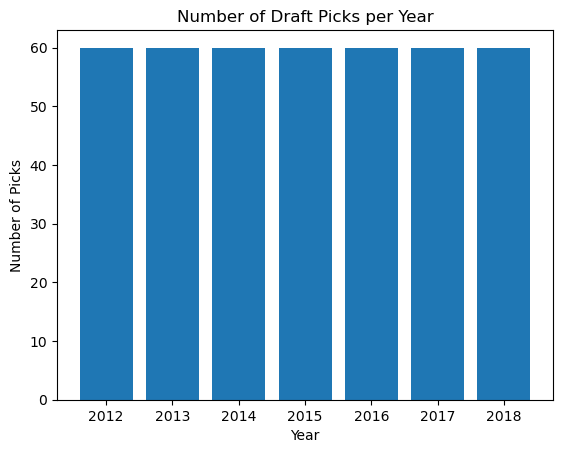

In [22]:
#Let's visualize our df for others like me who enjoy seeing confirmation

#Graph that's based on number of picks per year
#    As printed above, each year should have 60 values
#    30 in the first round and 30 in the second

plt.bar('Year','Pick', data = df_draft)
plt.xlabel('Year')
plt.ylabel('Number of Picks')
plt.title('Number of Draft Picks per Year')
plt.show()

In [125]:
#Lastly, just to be even *more* cautious, 
#    lets count the quantity of each pick number
#For large datasets, something similiar will have to be done 
#    since it isn't always feasible to look through all the data 
#Avoid Garbage In, Garbage Out!!!

#Just the first round and just the second round picks...
df_fr = df_draft[df_draft.Pick > 30]
df_sr = df_draft[df_draft.Pick <= 30]

#Then we get our years
year_value_counts = df_draft.Year.value_counts()
years = year_value_counts[:].index

#The years we are working with
print(years)

Int64Index([2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype='int64')


In [126]:
print('Number of first round picks by Year, followed by the ')
print('number of second round picks. We are expecting two ')
print('values of \'30\' with a comma inbetween for each year.')

#for each year, print the number of first and second round picks
for i in years:
    print(i,':', df_fr['Year'].value_counts()[i],',',df_sr['Year'].value_counts()[i])

Number of first round picks by Year, followed by the 
number of second round picks. We are expecting two 
values of '30' with a comma inbetween for each year.
2012 : 30 , 30
2013 : 30 , 30
2014 : 30 , 30
2015 : 30 , 30
2016 : 30 , 30
2017 : 30 , 30
2018 : 30 , 30


In [139]:
# Perfect! Appears to be a complete data set. No worries. 
# If we still weren't sure, we could check each pick value. 
# And it would look like:

sort_picks = df_draft.sort_values(by=['Pick'], ascending = False)
pick_counts = sort_picks.Pick.value_counts()

#Lowest and highest should be the same, both 7
print(pick_counts.max())
print(pick_counts.min())

#We should see 7 values for each of the 60 picks
pick_counts.value_counts()

7
7


7    60
Name: Pick, dtype: int64

In [140]:
#All set. Onto the next dataset

## Add our second dataset
### With college player career data

In [141]:
#Dataset with Player name, year, and draft pick
df_players = pd.read_csv('/Users/dempseywade/Desktop/gitRepo/NBADraftFinalProject/data/players.csv')

#Drop unnecessary columns
df_players = df_players.drop(['birthDate', 'birthPlace',
                             'highSchool','position','shoots',
                              'weight', 'height', 'college',
                             'draft_pick','draft_round','draft_team'], axis = 1)
#It may seem redundant to drop 'draft_pick' but the format is simplist 

#Rename name to Player for uniformity through datasets
df_players = df_players.rename(columns={'name':'Player', '_id':'player_id'})

#Reorder columns
cols = list(df_players.columns.values) 
cols.pop(cols.index('Player')) 
df_players = df_players[['Player']+cols]

#Filter old players
df_players = df_players.dropna()
df_players.draft_year = df_players.draft_year.astype('int')
df_players = df_players[df_players.draft_year >=2012]

df_players.head(10)

,Player,player_id,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,draft_year
9,Alex Abrines,abrinal01,0.5,38.7,36.8,88.0,174,8.8,5.3,1.4,5.0,52.5,2013
14,Quincy Acy,acyqu01,0.6,44.4,35.0,75.9,337,11.2,4.9,3.5,8.7,51.3,2012
20,Jordan Adams,adamsjo01,0.6,40.2,38.5,60.7,32,13.1,3.2,0.9,0.4,45.7,2014
22,Steven Adams,adamsst01,1.0,58.8,0.0,55.3,467,16.7,9.7,7.4,38.7,58.8,2013
24,Bam Adebayo,adebaba01,1.9,55.0,13.6,72.8,151,17.0,8.0,6.5,11.0,55.1,2017
41,Furkan Aldemir,aldemfu01,0.7,51.3,0.0,48.1,41,12.0,2.3,4.3,1.4,51.3,2012
55,Grayson Allen,allengr01,0.7,37.6,32.3,75.0,38,7.5,5.6,0.6,0.0,46.6,2018
56,Jarrett Allen,allenja01,1.0,59.0,18.3,73.2,152,18.1,9.6,7.0,11.9,59.5,2017
58,Kadeem Allen,allenka01,2.4,43.6,36.2,77.8,37,13.4,5.6,1.7,0.9,48.8,2017
93,Justin Anderson,anderju01,0.7,41.9,30.2,77.8,216,12.9,5.3,2.6,4.7,49.0,2015


In [26]:
#Sort by career PTS
# make it easier to read by putting 'career_PTS' in the third column
c_pts = df_players.pop('career_PTS')
df_players.insert(2, 'career_PTS', c_pts)

# then print the top 5 for a quick check 
df_players.sort_values(by=['career_PTS'], ascending = False).head(5)

,Player,player_id,career_PTS,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_TRB,career_WS,career_eFG%,draft_year
1197,Joel Embiid,embiijo01,24.3,3.2,48.1,31.5,78.8,158,24.5,11.4,16.8,51.4,2014
932,Anthony Davis,davisan02,23.7,2.1,51.7,31.4,79.5,466,27.4,10.5,72.0,52.8,2012
2485,Damian Lillard,lillada01,23.5,6.3,43.4,36.8,88.9,549,21.4,4.2,70.3,51.0,2012
4173,Karl-Anthony Towns,townska01,22.3,2.6,53.7,39.2,83.6,323,25.0,11.9,45.4,57.5,2015
2869,Donovan Mitchell,mitchdo01,22.1,3.9,43.4,35.1,80.5,156,16.9,3.9,10.2,49.9,2017


In [ ]:
#Quick sanity check...

In [10]:
#Combine the two datasets
#we want the new dataset to be less than the length as df_draft
#since some players did not join their teams ever
print('Previous Length:', len(df_draft))

df_nba = pd.merge(df_draft, df_players, on='Player', how='inner')

print('Current Length:', len(df_nba))

df_nba.head(10)

Previous Length: 420
Current Length: 349


,Player,Year,Pick,player_id,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,draft_year
0,Anthony Davis,2012,1,davisan02,2.1,51.7,31.4,79.5,466,27.4,23.7,10.5,72.0,52.8,2012
1,Michael Kidd-Gilchrist,2012,2,kiddgmi01,1.2,47.7,27.7,71.4,421,13.7,8.8,5.6,21.2,48.1,2012
2,Bradley Beal,2012,3,bealbr01,3.7,45.2,38.4,79.8,488,17.1,19.8,3.9,36.4,51.9,2012
3,Dion Waiters,2012,4,waitedi01,2.8,41.2,34.7,69.2,409,12.0,13.2,2.7,8.7,46.8,2012
4,Thomas Robinson,2012,5,robinth01,0.6,47.0,0.0,50.5,313,14.0,4.9,4.8,4.6,47.0,2012
5,Damian Lillard,2012,6,lillada01,6.3,43.4,36.8,88.9,549,21.4,23.5,4.2,70.3,51.0,2012
6,Harrison Barnes,2012,7,barneha02,1.5,44.6,37.4,79.5,540,13.3,13.6,4.9,29.7,50.0,2012
7,Terrence Ross,2012,8,rosste01,1.1,42.3,37.4,81.9,492,12.6,10.5,2.8,19.2,52.1,2012
8,Andre Drummond,2012,9,drumman01,1.2,54.3,14.7,44.8,542,22.1,14.1,13.7,56.4,54.4,2012
9,Austin Rivers,2012,10,riverau01,2.4,41.7,34.7,63.7,484,10.2,9.2,2.0,9.1,48.2,2012


In [8]:
df_chart = df_nba[['Player','Pick','career_AST','career_PER','career_PTS','career_TRB']]
df_chart.head(10)

,Player,Pick,career_AST,career_PER,career_PTS,career_TRB
0,Anthony Davis,1,2.1,27.4,23.7,10.5
1,Michael Kidd-Gilchrist,2,1.2,13.7,8.8,5.6
2,Bradley Beal,3,3.7,17.1,19.8,3.9
3,Dion Waiters,4,2.8,12.0,13.2,2.7
4,Thomas Robinson,5,0.6,14.0,4.9,4.8
5,Damian Lillard,6,6.3,21.4,23.5,4.2
6,Harrison Barnes,7,1.5,13.3,13.6,4.9
7,Terrence Ross,8,1.1,12.6,10.5,2.8
8,Andre Drummond,9,1.2,22.1,14.1,13.7
9,Austin Rivers,10,2.4,10.2,9.2,2.0


In [9]:
#Convert rebounds to correct types to view correlation
df_chart['career_TRB'] = df_chart['career_TRB'].astype('float')
df_chart['career_PER'] = df_chart['career_PER'].astype('float')

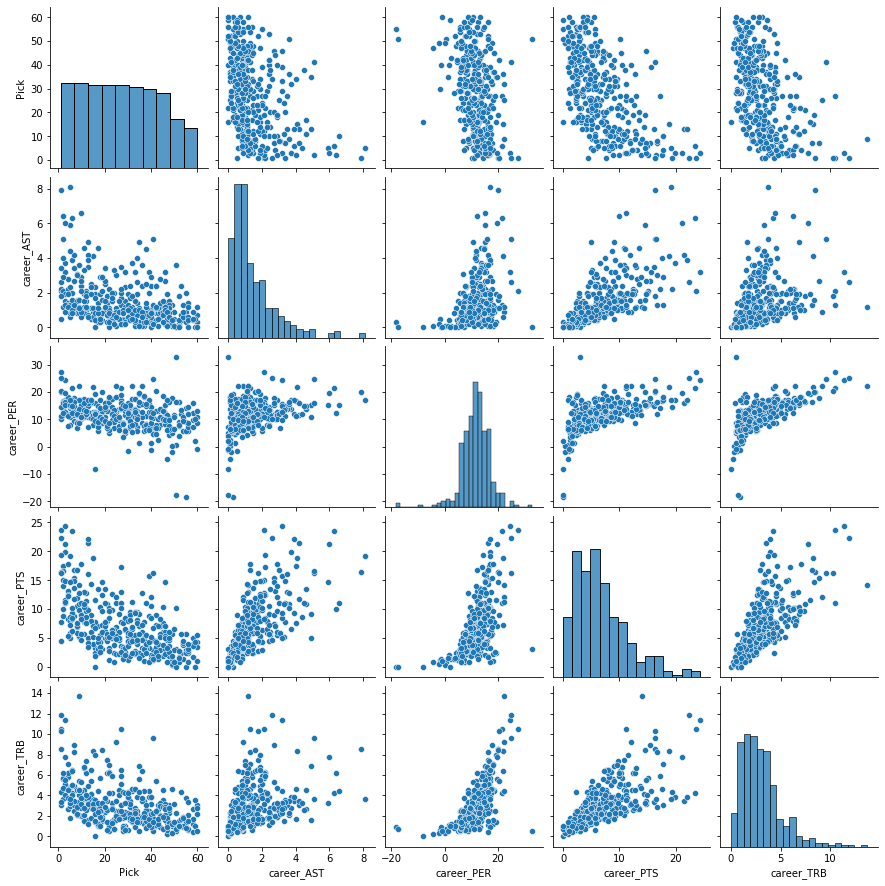

In [10]:
# Chart to view correlation between a few variables
# Will convert types and view all variables in df_nba later
sns.pairplot(df_chart)

If we look at the top row of graphs, where pick is compared to career assists per game and points per game, we are not surprised to observe that the closer you are to the x axis, the higher your x value will be. Meaning, the closer you were to the number 1 pick for that year, the higher your points and rebounds tended to be for your career

In [11]:
#Now incorporate salary so we have a target variable
df_salary = pd.read_csv('/Users/dwade/Desktop/dartmouth/FinalProject/Data/salaries_1985to2018.csv')

#Drop unnecessary
df_salary = df_salary.drop(['season_end','season_start'], axis = 1)

#Get mean salary for each player
df_salary = df_salary.groupby(['player_id']).mean()
df_salary = df_salary.astype('int')

df_salary.head(10)

,salary
player_id,
abdelal01,568800
abdulka01,2140000
abdulma02,2205500
abdulta01,3798280
abdursh01,8715090
abrinal01,5859882
ackeral01,649829
acresma01,321800
acyqu01,1146500


In [12]:
#Use player id to merge dataframes
df_nba = pd.merge(df_salary, df_nba, on='player_id', how='inner')
df_nba.head(10)

,player_id,salary,Player,Year,Pick,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,draft_year
0,abrinal01,5859882,Alex Abrines,2013,32,0.5,38.7,36.8,88.0,174,8.8,5.3,1.4,5.0,52.5,2013
1,acyqu01,1146500,Quincy Acy,2012,37,0.6,44.4,35.0,75.9,337,11.2,4.9,3.5,8.7,51.3,2012
2,adamsjo01,1404600,Jordan Adams,2014,22,0.6,40.2,38.5,60.7,32,13.1,3.2,0.9,0.4,45.7,2014
3,adamsst01,6433461,Steven Adams,2013,12,1.0,58.8,0.0,55.3,467,16.7,9.7,7.4,38.7,58.8,2013
4,adebaba01,2490360,Bam Adebayo,2017,14,1.9,55.0,13.6,72.8,151,17.0,8.0,6.5,11.0,55.1,2017
5,aldemfu01,3000000,Furkan Aldemir,2012,53,0.7,51.3,0.0,48.1,41,12.0,2.3,4.3,1.4,51.3,2012
6,allenja01,1713720,Jarrett Allen,2017,22,1.0,59.0,18.3,73.2,152,18.1,9.6,7.0,11.9,59.5,2017
7,anderju01,1514200,Justin Anderson,2015,21,0.7,41.9,30.2,77.8,216,12.9,5.3,2.6,4.7,49.0,2015
8,anderky01,1395085,Kyle Anderson,2014,30,1.9,49.2,32.4,70.6,300,13.5,5.3,3.9,15.4,51.4,2014
9,anigbik01,950000,Ike Anigbogu,2017,47,0.1,33.3,-,83.3,14,17.0,0.9,0.9,0.0,33.3,2017


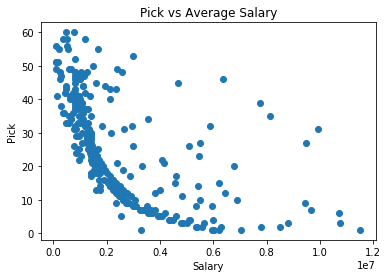

In [13]:
#Scatter plot of Pick vs Average Salary
plt.scatter('salary', 'Pick', data = df_nba)
plt.ylabel('Pick')
plt.xlabel('Salary')
plt.title('Pick vs Average Salary')
plt.show()

This is the chart that we would expect, with a fairly definitive curve between a high draft pick ranking and a high salary, with outliers. We will now look for and find other variables that contribute to a high salary, without including their draft pick. 

### Create a new varible: TotalPRA
It might be more predictive to see the total points, rebounds, and assists a college player has contributed. Along with making bins for salary, TotalPRA will allow us to try clustering and determine if an "all around" player (one with a high total of points,rebounds, and assists) is more valuable than one that is good at only one or two of these catagories.

In [14]:
#Make a new column for Total Points, Rebounds, Assists
columns_to_sum = list(df_nba[['career_AST', 'career_PTS','career_TRB']])
df_nba['TotalPRA'] = df_nba[columns_to_sum].sum(axis = 1)
df_nba.head(5)

,player_id,salary,Player,Year,Pick,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,draft_year,TotalPRA
0,abrinal01,5859882,Alex Abrines,2013,32,0.5,38.7,36.8,88.0,174,8.8,5.3,1.4,5.0,52.5,2013,5.8
1,acyqu01,1146500,Quincy Acy,2012,37,0.6,44.4,35.0,75.9,337,11.2,4.9,3.5,8.7,51.3,2012,5.5
2,adamsjo01,1404600,Jordan Adams,2014,22,0.6,40.2,38.5,60.7,32,13.1,3.2,0.9,0.4,45.7,2014,3.8
3,adamsst01,6433461,Steven Adams,2013,12,1.0,58.8,0.0,55.3,467,16.7,9.7,7.4,38.7,58.8,2013,10.7
4,adebaba01,2490360,Bam Adebayo,2017,14,1.9,55.0,13.6,72.8,151,17.0,8.0,6.5,11.0,55.1,2017,9.9


In [15]:
#View data types to change in next cell 
df_nba.dtypes

player_id       object
salary           int64
Player          object
Year             int64
Pick             int64
career_AST     float64
career_FG%      object
career_FG3%     object
career_FT%      object
career_G         int64
career_PER      object
career_PTS     float64
career_TRB      object
career_WS       object
career_eFG%     object
draft_year       int64
TotalPRA       float64
dtype: object

In [16]:
#Convert to correct types
df_nba = df_nba.dropna()
df_nba = df_nba.replace('-', 0)
df_nba['Player'] = df_nba['Player'].astype('string')
df_nba['career_AST'] = df_nba['career_AST'].astype('float')
df_nba['career_FG%'] = df_nba['career_FG%'].astype('float')
df_nba['career_FG3%'] = df_nba['career_FG3%'].astype('float')
df_nba['career_FT%'] = df_nba['career_FT%'].astype('float')
df_nba['career_PER'] = df_nba['career_PER'].astype('float')
df_nba['career_FT%'] = df_nba['career_FT%'].astype('float')
df_nba['career_TRB'] = df_nba['career_TRB'].astype('float')
df_nba['career_WS'] = df_nba['career_WS'].astype('float')
df_nba['career_eFG%'] = df_nba['career_eFG%'].astype('float')

df_nba.dtypes

player_id       object
salary           int64
Player          string
Year             int64
Pick             int64
career_AST     float64
career_FG%     float64
career_FG3%    float64
career_FT%     float64
career_G         int64
career_PER     float64
career_PTS     float64
career_TRB     float64
career_WS      float64
career_eFG%    float64
draft_year       int64
TotalPRA       float64
dtype: object

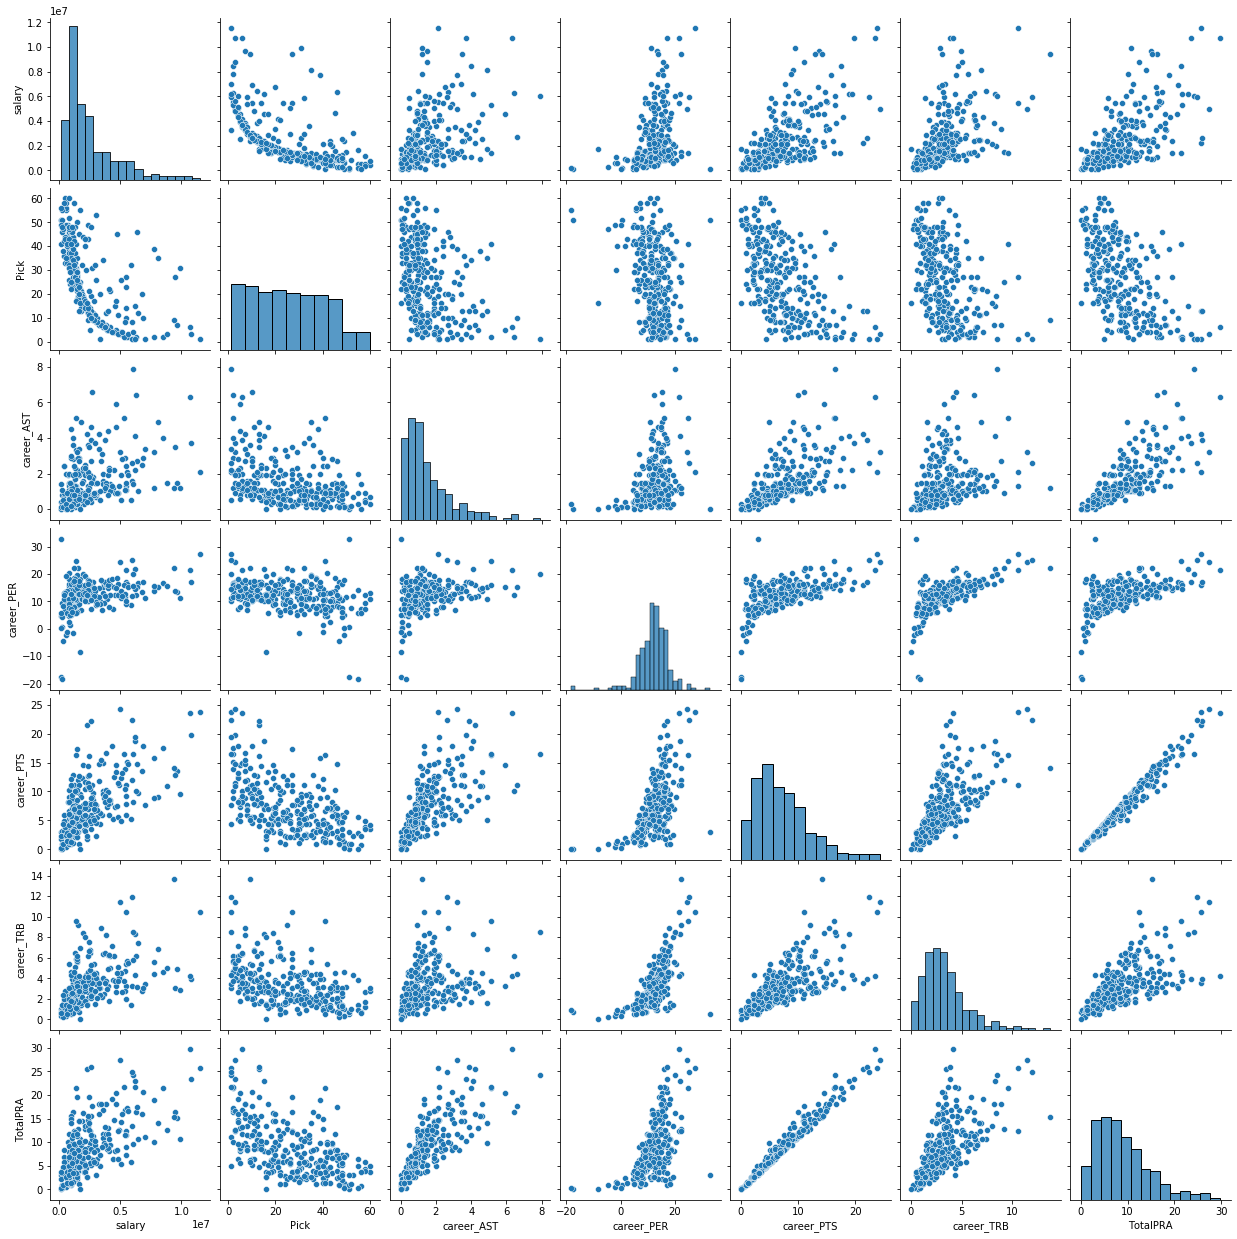

In [17]:
#Rechart now that variables are of correct type
df_chart = df_nba[['salary','Pick','career_AST','career_PER',
                   'career_PTS','career_TRB','TotalPRA']]
sns.pairplot(df_chart)

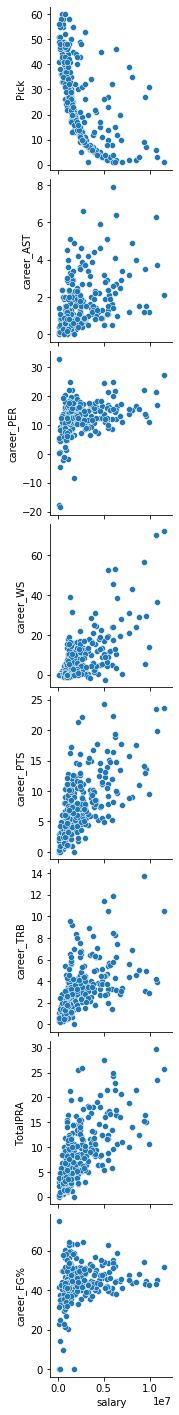

In [18]:
df_chart = df_nba[['salary','Pick','career_AST','career_PER',
                   'career_PTS','career_TRB','TotalPRA',
                  'career_WS', 'career_FG%']]

sns.pairplot(data=df_chart,
                  x_vars=['salary'],
                  y_vars=['Pick','career_AST','career_PER','career_WS',
                   'career_PTS','career_TRB','TotalPRA','career_FG%' ])

## Clustering based on salary

In [19]:
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, homogeneity_completeness_v_measure, adjusted_rand_score

In [20]:
X = df_nba[['TotalPRA', 'salary']]

results = pd.DataFrame({1:[1, 1]})
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    sse = kmeans.inertia_
    sil = silhouette_score(X, kmeans.fit_predict(X))
    temp = pd.DataFrame({i:[sse, sil]})
    results = results.join(temp)

results = results.drop(results.columns[0], axis = 1)
results = results.T
results = results.rename(columns = {0:'SSE',1:'Silhouette'})
results

,SSE,Silhouette
2,3.828340e+14,0.704785
3,1.932548e+14,0.683763
4,9.639867e+13,0.624929
5,6.654123e+13,0.580414
6,4.692616e+13,0.564004
7,3.423874e+13,0.559039
8,2.782817e+13,0.564084
9,2.128061e+13,0.547891
10,1.715087e+13,0.570473


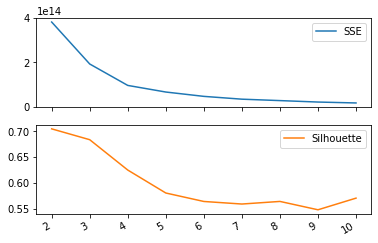

In [21]:
#Plot the above dataframe
axes = results.plot.line(subplots=True)

From the above graphs, we can see an approximate number of clusters could be 4, so lets see what 4 clusters look like:

In [22]:
#To save our image and write it further at the end
import pickle

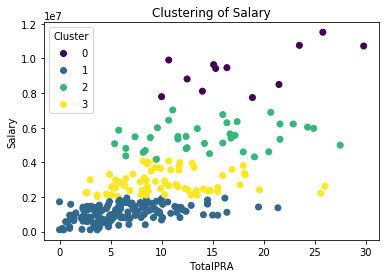

In [23]:
kmeans = KMeans(n_clusters = 4).fit(X)
labels = kmeans.fit_predict(X)

#Recategorize labels so they are in increasing order
labels2 = pd.DataFrame(labels.copy())
#labels2 = labels2.replace([0,1,2,3,4], [4,0,1,3,2])

X['Labels'] = labels2

gif, ax = plt.subplots()

scatter = plt.scatter(X['TotalPRA'], X['salary'], c = X['Labels'], label = labels2)
legend = ax.legend(*scatter.legend_elements(), title='Cluster')

plt.xlabel('TotalPRA')
plt.ylabel('Salary')
plt.title('Clustering of Salary')

pickle.dump(ax, open('cluster.pickle', 'wb'))

In [24]:
df_nba['Cluster_labels'] = labels2

#Maximum value in each cluster label
df_nba.groupby(['Cluster_labels'], sort=False)['salary'].max()

Cluster_labels
2     7026240
1     1944863
3     4140340
0    11515044
Name: salary, dtype: int64

In [25]:
#minimum value in each cluster label
Y = df_nba.groupby(['Cluster_labels'], sort=False)['salary'].min()
Y.sort_values()

Cluster_labels
1     100000
3    2028360
2    4186320
0    7746286
Name: salary, dtype: int64

## Make a bin for salaries

In [26]:
df_nba.salary.describe()

count    2.750000e+02
mean     2.484205e+06
std      2.185626e+06
min      1.000000e+05
25%      9.783190e+05
50%      1.645200e+06
75%      3.262460e+06
max      1.151504e+07
Name: salary, dtype: float64

In [27]:
#Using our cluster values, each salary will be divided by the minimum in it's category
df_nba.groupby(['Cluster_labels'], sort=False)['salary'].min()

Cluster_labels
2    4186320
1     100000
3    2028360
0    7746286
Name: salary, dtype: int64

In [28]:
df_nba['Salary_band'] = 0
df_nba.loc[df_nba['salary']<=2028360, 'Salary_band'] = 0
df_nba.loc[(df_nba['salary']>2028360)&(df_nba['salary']<=4186320), 'Salary_band'] = 1
df_nba.loc[(df_nba['salary']>4186320)&(df_nba['salary']<=7746286), 'Salary_band'] = 2
df_nba.loc[df_nba['salary']>7746286, 'Salary_band'] = 3

#Visualize the Age_band
df_nba.head(5)

,player_id,salary,Player,Year,Pick,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,draft_year,TotalPRA,Cluster_labels,Salary_band
0,abrinal01,5859882,Alex Abrines,2013,32,0.5,38.7,36.8,88.0,174,8.8,5.3,1.4,5.0,52.5,2013,5.8,2,2
1,acyqu01,1146500,Quincy Acy,2012,37,0.6,44.4,35.0,75.9,337,11.2,4.9,3.5,8.7,51.3,2012,5.5,1,0
2,adamsjo01,1404600,Jordan Adams,2014,22,0.6,40.2,38.5,60.7,32,13.1,3.2,0.9,0.4,45.7,2014,3.8,1,0
3,adamsst01,6433461,Steven Adams,2013,12,1.0,58.8,0.0,55.3,467,16.7,9.7,7.4,38.7,58.8,2013,10.7,2,2
4,adebaba01,2490360,Bam Adebayo,2017,14,1.9,55.0,13.6,72.8,151,17.0,8.0,6.5,11.0,55.1,2017,9.9,3,1


In [29]:
#Get value counts for salary bands
df_nba['Salary_band'].value_counts()

0    157
1     70
2     37
3     11
Name: Salary_band, dtype: int64

In [30]:
#The above should be equal to the value in each cluster
labels2[0].value_counts()

1    156
3     70
2     37
0     12
Name: 0, dtype: int64

## Decision Tree 
Using the cluster label as our target variable

In [31]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn import tree

In [32]:
#Select our X and y and perform train test split
#Dropping career Games due to players leaving college after 1 year

np.random.seed(1)

X = df_nba.drop(['salary', 'player_id', 'Pick','Cluster_labels',
                 'Player', 'Year', 'Salary_band', 'career_G'], axis = 1)
y = df_nba.Salary_band 

feature_cols = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [33]:
# To find best depth
max_depth_range = list(range(1, 10))

accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)
accuracy

[0.4727272727272727,
 0.509090909090909,
 0.5454545454545454,
 0.5636363636363636,
 0.5636363636363636,
 0.6,
 0.6181818181818182,
 0.6,
 0.5818181818181818]

We will choose a max depth of 7, froom the above accuracy score

In [34]:
#Create our tree and predict
clf = DecisionTreeClassifier(max_depth=7)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [35]:
#Check the accuracy score
print('Accuracy score:',metrics.accuracy_score(y_test, y_pred))

Accuracy score: 0.6181818181818182


In [36]:
cross_val_score(clf, X, y)

array([0.52727273, 0.54545455, 0.58181818, 0.58181818, 0.63636364])

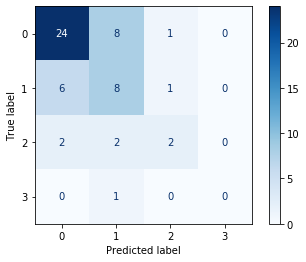

In [37]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test, cmap='Blues')

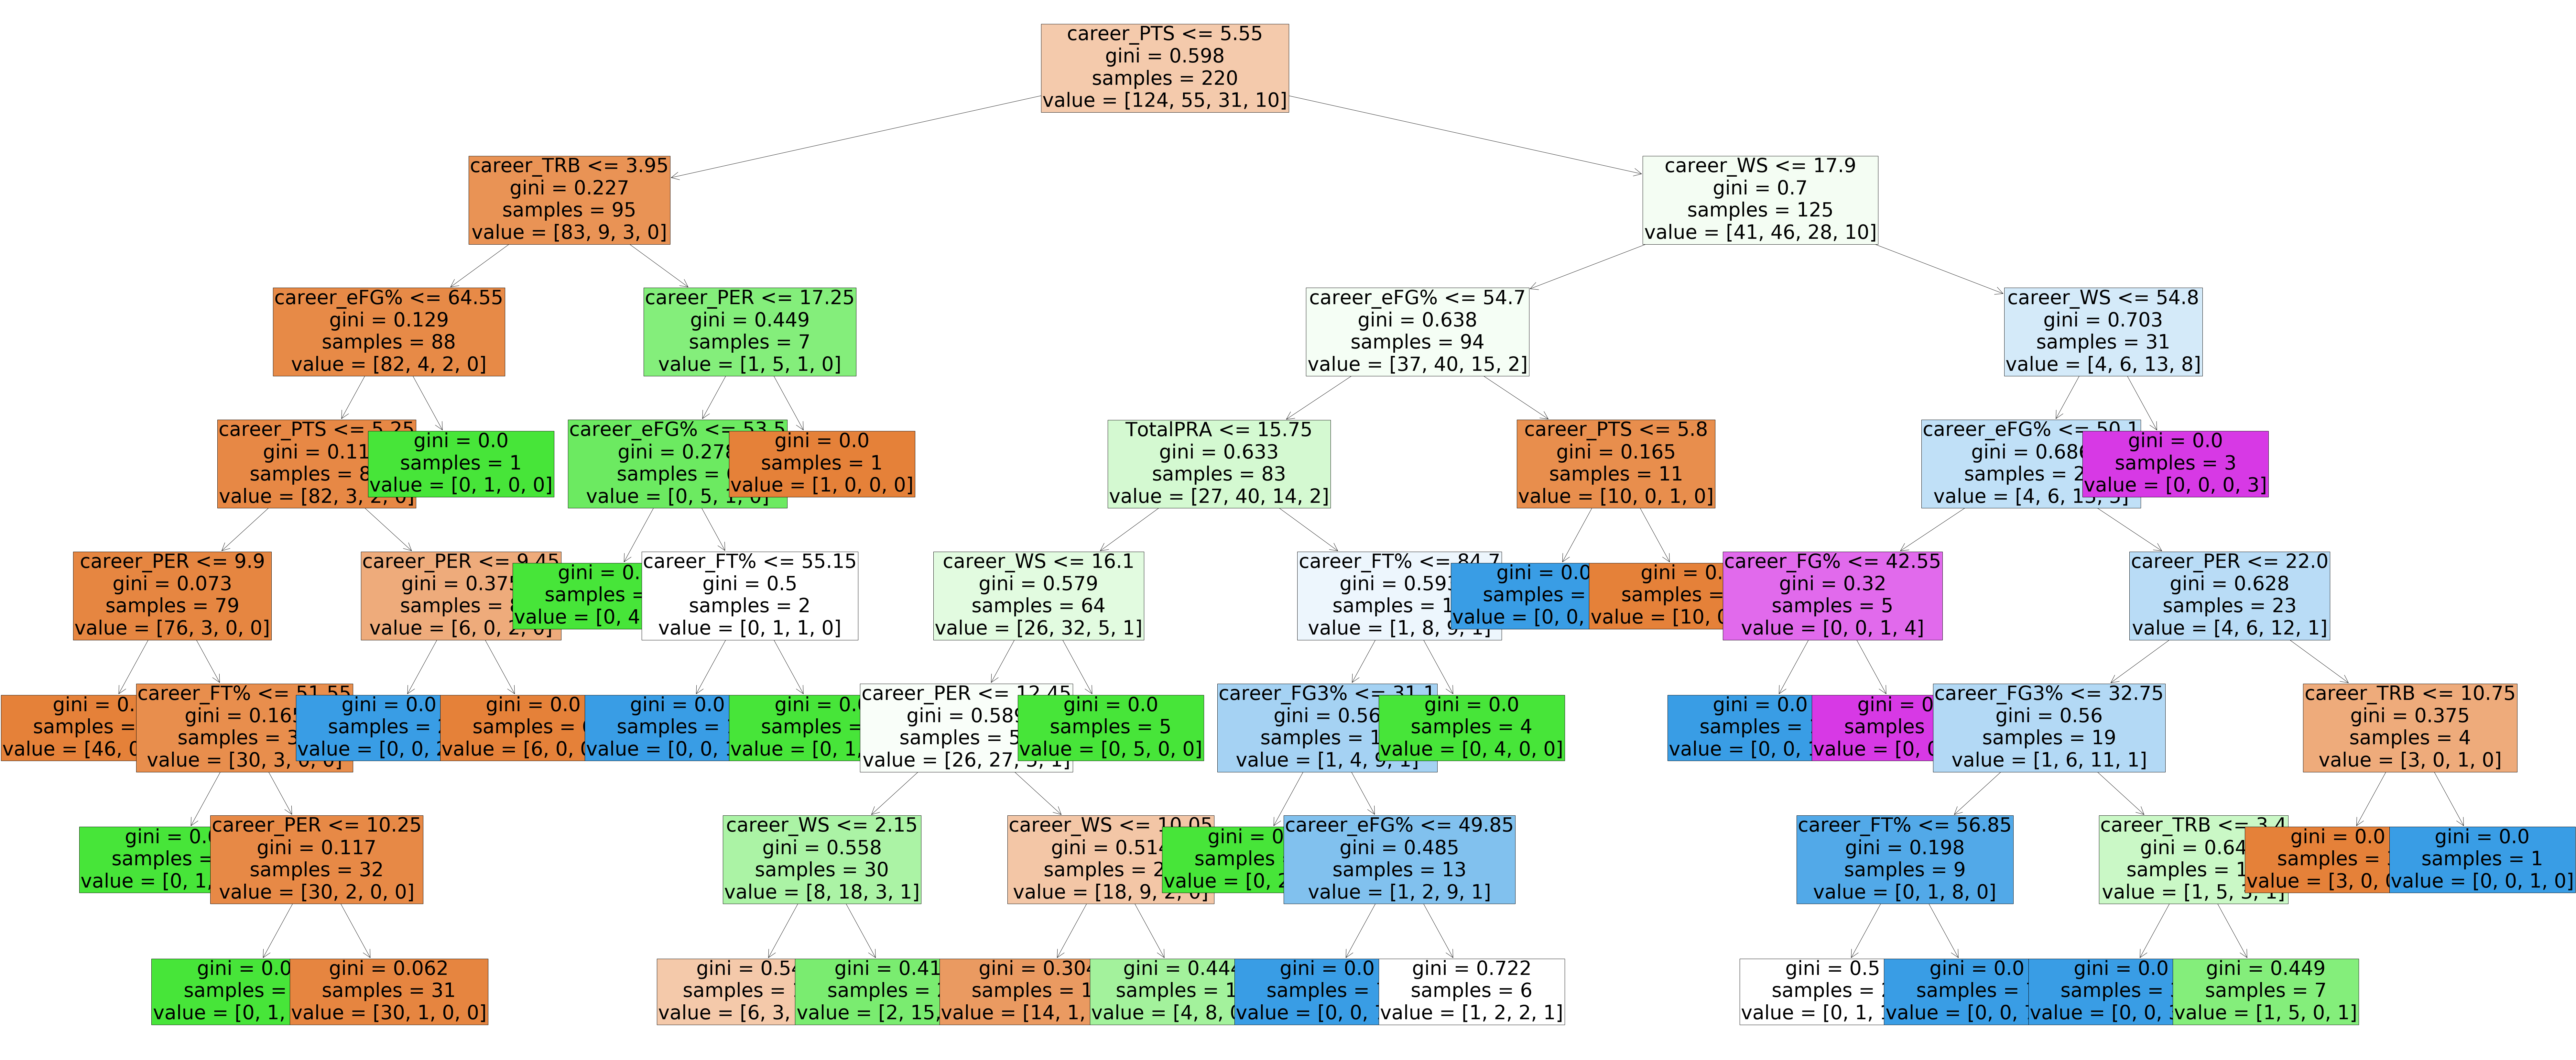

In [38]:
#Vizualizing our tree to see which attributes were closes to root node
fig = plt.figure(figsize=(140,60))
clf_tree = tree.plot_tree(clf, 
                   feature_names=feature_cols,
                   fontsize=60,
                   filled=True)

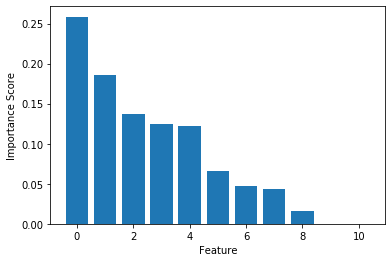

Feature 0 : career_PTS score:     0.2585 

Feature 1 : career_WS score:     0.1864 

Feature 2 : career_eFG% score:     0.1367 

Feature 3 : career_PER score:     0.1241 

Feature 4 : career_TRB score:     0.1216 

Feature 5 : career_FT% score:     0.0655 

Feature 6 : career_FG3% score:     0.0469 

Feature 7 : TotalPRA score:     0.0437 

Feature 8 : career_FG% score:     0.0165 

Feature 9 : career_AST score:     0.0000 

Feature 10 : draft_year score:     0.0000 



In [39]:
#Most important variables 
importance = clf.feature_importances_

dtc_bar = pd.DataFrame(importance, [x for x in range(len(importance))])
dtc_bar = dtc_bar.T
dtc_bar.columns = feature_cols
dtc_bar = dtc_bar.T
dtc_bar = dtc_bar.sort_values(by=0, ascending = False)

height = dtc_bar[0]
bars = dtc_bar.index
x_pos = np.arange(len(bars))

plt.bar(x_pos, height)
plt.ylabel('Importance Score')
plt.xlabel('Feature')
plt.show()

x = dtc_bar.index
y = []
for i in x:
    y.append(i)

for i in range(len(dtc_bar[0])):
    k = dtc_bar[0][i]
    print('Feature',i,':', y[i],'score:',"{:10.4f}".format(k),'\n')
#plot feature importance


## Linear Regression

In [41]:
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

In [42]:
X = df_nba[['career_AST','career_FG3%','career_FT%',
           'career_PER','career_TRB','career_eFG%','TotalPRA',
            'career_WS','career_eFG%']]

y = df_nba['Salary_band']

In [43]:
#Select the 5 best estimators out of our 10 attributes
lr = linear_model.LinearRegression()
rfe = RFE(lr, n_features_to_select=5)
rfe.fit(X, y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=5, step=1, verbose=0)

In [44]:
print(sorted(zip(map(lambda x: x, rfe.ranking_), X.columns)))

[(1, 'TotalPRA'), (1, 'career_AST'), (1, 'career_PER'), (1, 'career_TRB'), (1, 'career_WS'), (2, 'career_eFG%'), (3, 'career_FT%'), (4, 'career_eFG%'), (5, 'career_FG3%')]


As we can see from above, our five best estimators are:
    1. Total Points Rebounds Assists
    2. Career Assists
    3. Career PER
    4. Career Rebounds 
    5. Career Win Share

As a reminder, our top 5 predictive variables from the DTC were:
    1. Career Assists
    2. Career FG %
    3. Career 3 PT %
    4. Career FT %
    5. Career PER


In [45]:
#Lets create a new model only using these top 5 attributes
X = df_nba[['TotalPRA','career_AST','career_PTS','career_TRB','career_WS']]
y = df_nba['Salary_band']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

lr = linear_model.LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

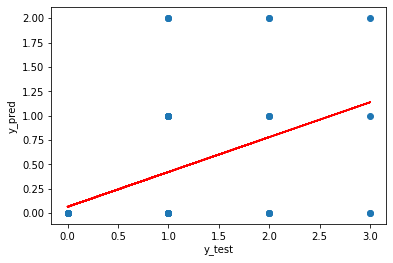

In [46]:
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.plot(y_test, p(y_test),'r--')

In [47]:
unique, counts = np.unique(y_test, return_counts = True)
print('Actual salary band in y_test with count:\n',np.asarray((unique, counts)).T)

Actual salary band in y_test with count:
 [[ 0 48]
 [ 1 22]
 [ 2  9]
 [ 3  4]]


In [48]:
unique, counts = np.unique(y_pred, return_counts = True)
print('Predicted salary band in y_pred with count:\n',np.asarray((unique, counts)).T)

Predicted salary band in y_pred with count:
 [[ 0 65]
 [ 1 12]
 [ 2  6]]


In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Accuracy score for Logistic Regression', metrics.accuracy_score(y_test, y_pred), '\n')

print('Precision score:', precision_score(y_test, y_pred, average=None), '\n')

print('Recall score:', recall_score(y_test, y_pred, average=None), '\n')

print('f1 score:', f1_score(y_test, y_pred, average=None), '\n')

Accuracy score for Logistic Regression 0.6987951807228916 

Precision score: [0.73846154 0.66666667 0.33333333 0.        ] 

Recall score: [1.         0.36363636 0.22222222 0.        ] 

f1 score: [0.84955752 0.47058824 0.26666667 0.        ] 



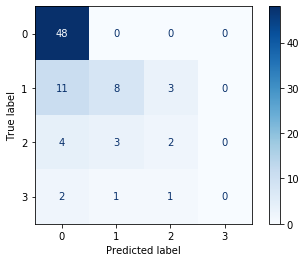

In [50]:
plot_confusion_matrix(lr, X_test, y_test, cmap='Blues')

In [51]:
importance

array([0.        , 0.01650933, 0.04690826, 0.06547478, 0.12410265,
       0.25854408, 0.12162725, 0.18639613, 0.13673202, 0.        ,
       0.04370549])

Feature 0 : TotalPRA 
 score: [-0.09955343 -0.07802557 -0.02152786  0.05534745 -0.08224809] 

Feature 1 : career_AST 
 score: [ 0.03115394  0.10698675 -0.07583281  0.24473601 -0.06214757] 

Feature 2 : career_PTS 
 score: [ 0.08280947 -0.02182666  0.10463614  0.14648745 -0.01177775] 

Feature 3 : career_TRB 
 score: [-0.01440999 -0.00713452 -0.00727547 -0.44657091  0.15617341] 



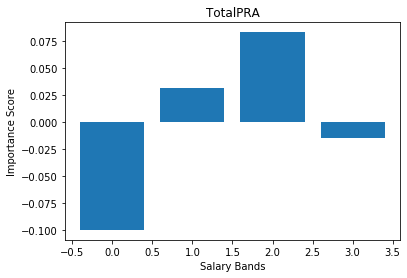

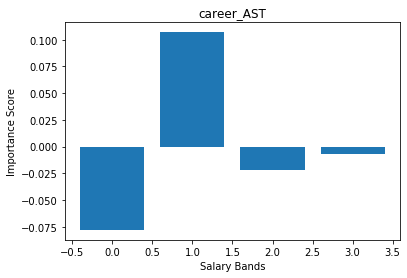

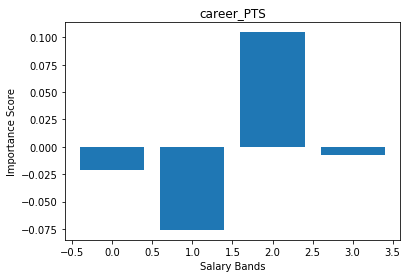

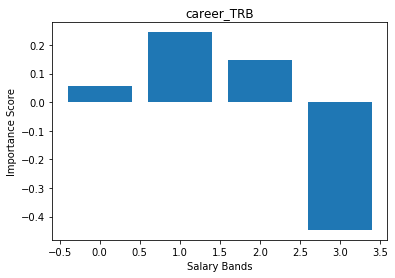

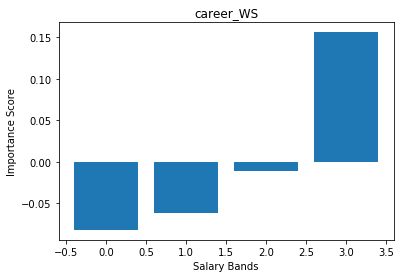

In [52]:
importance = lr.coef_
importance = importance.T
# summarize feature importance
for i,v in enumerate(importance.T):
    print('Feature', i,':', X.columns[i], '\n score:', v, '\n')
#plot feature importance

plot1 = plt.figure(1)
ax1 = plt.bar([x for x in range(len(importance[0]))], importance[0])
plt.title(X.columns[0])
plt.ylabel('Importance Score')
plt.xlabel('Salary Bands')

plot2 = plt.figure(2)
ax2 = plt.bar([x for x in range(len(importance[1]))], importance[1])
plt.title(X.columns[1])
plt.ylabel('Importance Score')
plt.xlabel('Salary Bands')

plot3 = plt.figure(3)
ax3 = plt.bar([x for x in range(len(importance[2]))], importance[2])
plt.title(X.columns[2])
plt.ylabel('Importance Score')
plt.xlabel('Salary Bands')

plot4 = plt.figure(4)
ax4 = plt.bar([x for x in range(len(importance[3]))], importance[3])
plt.title(X.columns[3])
plt.ylabel('Importance Score')
plt.xlabel('Salary Bands')

plot5 = plt.figure(5)
ax5 = plt.bar([x for x in range(len(importance[4]))], importance[4])
plt.title(X.columns[4])
plt.ylabel('Importance Score')
plt.xlabel('Salary Bands')

plt.show()

## Conclusion

By inspecting the Decision Tree and Logistic Regression, we can identify the most important variables. In order, between the two, we can see that career Points in the most important variable, with career Win Share being the next most important. Attributes like Rebounds and Assists helped predict low salary but not high salary. 

Although I would not have anticipated Win Share to have such a high importance score, it is not surprising that NBA Presidents want to keep their team together if that team is winning, and over pay a player to keep the team synergy together. 

The Decision Tree focused on efficiency scores, such as shooting percentage and PER, while logistic regression had more success predicting the salary band with individual performance such as Points, Assists, and Win Share. 